In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv("../data/xigua3.0.csv", index_col='编号')
data

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
编号,,,,,,,,,
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否


In [ ]:
# 回归

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['密度']], data['含糖率'])
x_train, x_test, y_train, y_test

(       密度
 12  0.639
 8   0.666
 15  0.593
 0   0.697
 2   0.634
 16  0.719
 9   0.243
 6   0.481
 5   0.403
 3   0.608
 11  0.343
 14  0.360,
        密度
 7   0.437
 10  0.245
 13  0.657
 4   0.556
 1   0.774,
 12    0.161
 8     0.091
 15    0.042
 0     0.460
 2     0.264
 16    0.103
 9     0.267
 6     0.149
 5     0.237
 3     0.318
 11    0.099
 14    0.370
 Name: 含糖率, dtype: float64,
 7     0.211
 10    0.057
 13    0.198
 4     0.215
 1     0.376
 Name: 含糖率, dtype: float64)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print(model.score(x_train,y_train), model.score(x_test,y_test))

0.007900916492778354 -0.2464542515304362


In [38]:
x_line = np.linspace(0, 1.0, 1001).reshape((1001,1))
y_line = model.predict(x_line)
x_line.shape

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(1001, 1)

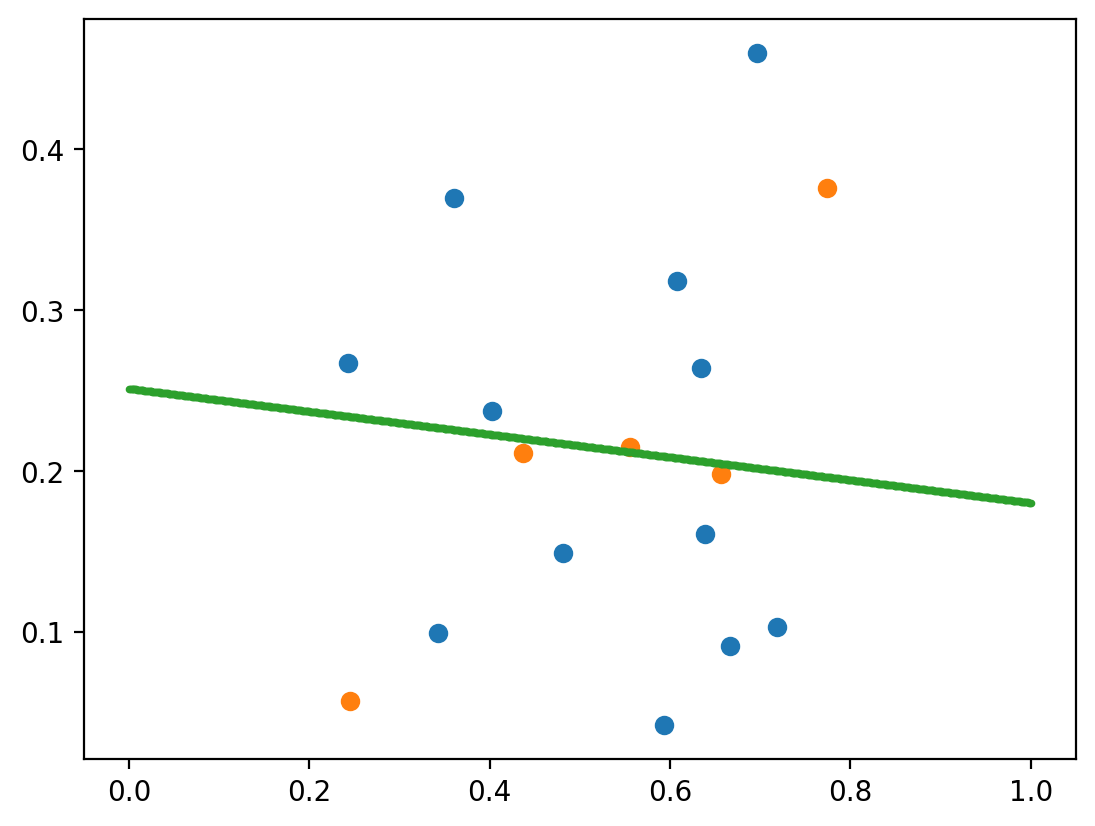

In [39]:
plt.figure(dpi=200)
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.scatter(x_line, y_line, s=3)
plt.show()

In [ ]:
# 分类

In [43]:
data2 = pd.get_dummies(data)
data2

,密度,含糖率,色泽_乌黑,色泽_浅白,色泽_青绿,根蒂_硬挺,根蒂_稍蜷,根蒂_蜷缩,敲声_沉闷,敲声_浊响,...,纹理_模糊,纹理_清晰,纹理_稍糊,脐部_凹陷,脐部_平坦,脐部_稍凹,触感_硬滑,触感_软粘,好瓜_否,好瓜_是
编号,,,,,,,,,,,,,,,,,,,,,
1,0.697,0.460,0,0,1,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
2,0.774,0.376,1,0,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1
3,0.634,0.264,1,0,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
4,0.608,0.318,0,0,1,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1
5,0.556,0.215,0,1,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
6,0.403,0.237,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1
7,0.481,0.149,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,1
8,0.437,0.211,1,0,0,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
9,0.666,0.091,1,0,0,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0


In [45]:
data2.iloc[:,:-2]

,密度,含糖率,色泽_乌黑,色泽_浅白,色泽_青绿,根蒂_硬挺,根蒂_稍蜷,根蒂_蜷缩,敲声_沉闷,敲声_浊响,敲声_清脆,纹理_模糊,纹理_清晰,纹理_稍糊,脐部_凹陷,脐部_平坦,脐部_稍凹,触感_硬滑,触感_软粘
编号,,,,,,,,,,,,,,,,,,,
1,0.697,0.460,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
2,0.774,0.376,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0
3,0.634,0.264,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
4,0.608,0.318,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0
5,0.556,0.215,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
6,0.403,0.237,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1
7,0.481,0.149,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
8,0.437,0.211,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0
9,0.666,0.091,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0


In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data2.iloc[:,:-2], data2.iloc[:,-1])
x_train, x_test, y_train, y_test

(       密度    含糖率  色泽_乌黑  色泽_浅白  色泽_青绿  根蒂_硬挺  根蒂_稍蜷  根蒂_蜷缩  敲声_沉闷  敲声_浊响  \
 编号                                                                         
 12  0.343  0.099      0      1      0      0      0      1      0      1   
 2   0.774  0.376      1      0      0      0      0      1      1      0   
 15  0.360  0.370      1      0      0      0      1      0      0      1   
 9   0.666  0.091      1      0      0      0      1      0      1      0   
 4   0.608  0.318      0      0      1      0      0      1      1      0   
 14  0.657  0.198      0      1      0      0      1      0      1      0   
 16  0.593  0.042      0      1      0      0      0      1      0      1   
 1   0.697  0.460      0      0      1      0      0      1      0      1   
 5   0.556  0.215      0      1      0      0      0      1      0      1   
 10  0.243  0.267      0      0      1      1      0      0      0      0   
 3   0.634  0.264      1      0      0      0      0      1      0      1   

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.score(x_train,y_train), model.score(x_test,y_test))

1.0 0.4


In [48]:
x_train, x_test, y_train, y_test = train_test_split(data2[['密度','含糖率']], data2.iloc[:,-1])
x_train, x_test, y_train, y_test

(       密度    含糖率
 编号              
 14  0.657  0.198
 6   0.403  0.237
 15  0.360  0.370
 17  0.719  0.103
 10  0.243  0.267
 12  0.343  0.099
 1   0.697  0.460
 9   0.666  0.091
 7   0.481  0.149
 4   0.608  0.318
 13  0.639  0.161
 5   0.556  0.215,
        密度    含糖率
 编号              
 8   0.437  0.211
 11  0.245  0.057
 2   0.774  0.376
 3   0.634  0.264
 16  0.593  0.042,
 编号
 14    0
 6     1
 15    0
 17    0
 10    0
 12    0
 1     1
 9     0
 7     1
 4     1
 13    0
 5     1
 Name: 好瓜_是, dtype: uint8,
 编号
 8     1
 11    0
 2     1
 3     1
 16    0
 Name: 好瓜_是, dtype: uint8)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.score(x_train,y_train), model.score(x_test,y_test))

0.5833333333333334 0.4


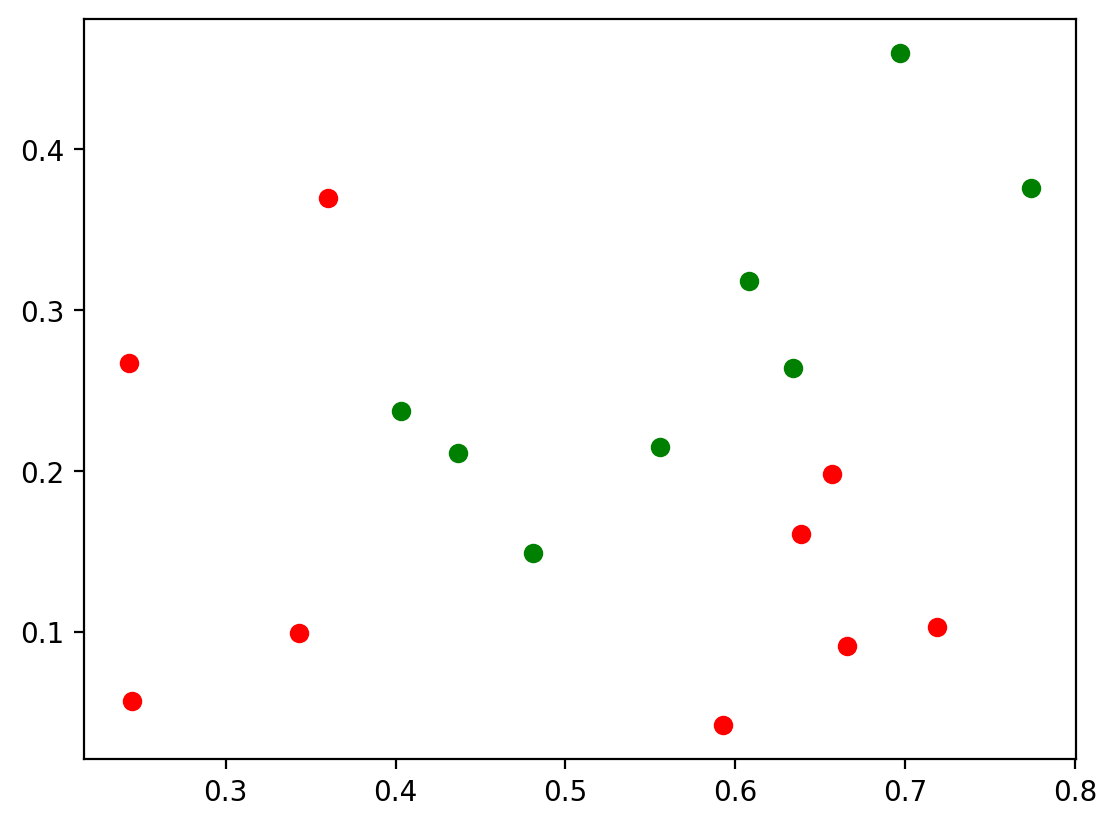

In [51]:
plt.figure(dpi=200)
plt.scatter(data2[data2['好瓜_是']==1]['密度'],data2[data2['好瓜_是']==1]['含糖率'], c='g')
plt.scatter(data2[data2['好瓜_是']==0]['密度'],data2[data2['好瓜_是']==0]['含糖率'], c='r')
plt.show()

In [52]:
model = LogisticRegression()
model.fit(data2[['密度','含糖率']], data2.iloc[:,-1])
y_draw = model.predict(data2[['密度','含糖率']])
y_draw

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [55]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)
x, y = np.meshgrid(x,y)
disp_input = np.vstack((x.flatten(), y.flatten())).T
disp_input

array([[0.  , 0.  ],
       [0.01, 0.  ],
       [0.02, 0.  ],
       ...,
       [0.98, 1.  ],
       [0.99, 1.  ],
       [1.  , 1.  ]])

In [56]:
disp_predict = model.predict(disp_input)
disp_predict

C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

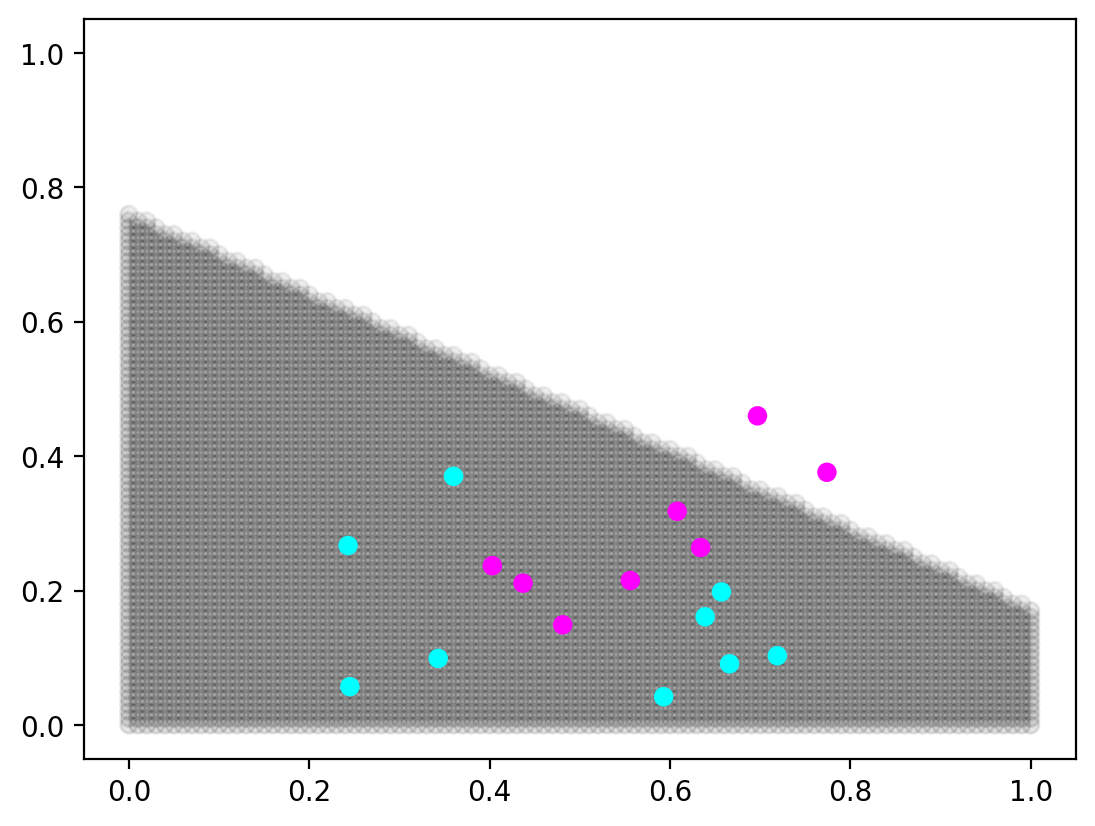

In [67]:
plt.figure(dpi=200)
plt.scatter(disp_input[:,0], disp_input[:,1], c=disp_predict, cmap='gray', alpha=0.1)
#plt.scatter(data2['密度'],data2['含糖率'], c=y_draw, cmap='cool')
plt.scatter(data2['密度'],data2['含糖率'], c=data2['好瓜_是'], cmap='cool')
plt.show()

C:\conda\venv\torch\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


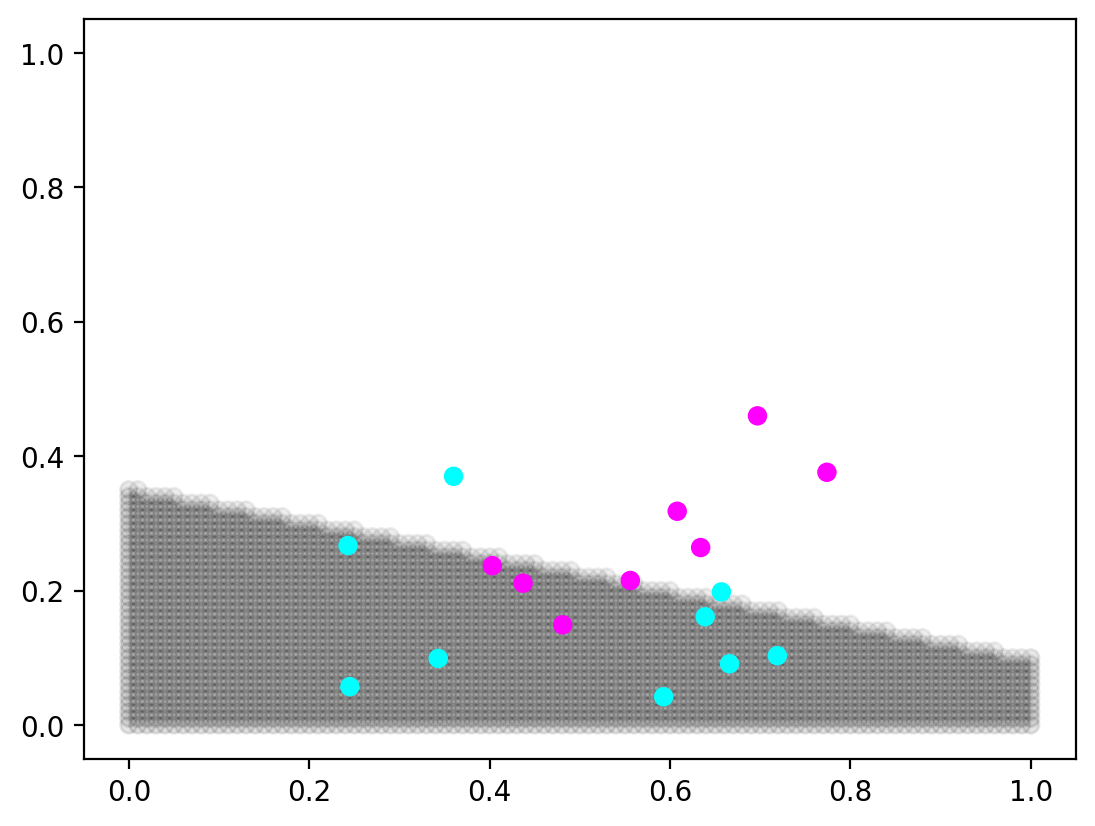

In [73]:
model = LogisticRegression(C=100,max_iter=1000000000, tol=1e-8, penalty='none')
model.fit(data2[['密度','含糖率']], data2.iloc[:,-1])
y_draw = model.predict(data2[['密度','含糖率']])
plt.figure(dpi=200)
plt.scatter(disp_input[:,0], disp_input[:,1], c=model.predict(disp_input), cmap='gray', alpha=0.1)
plt.scatter(data2['密度'],data2['含糖率'], c=data2['好瓜_是'], cmap='cool')
plt.show()

In [76]:
from sklearn import datasets
ch = datasets.fetch_california_housing()

In [79]:
ch.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [77]:
ch.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [78]:
ch.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])